# Import

In [1]:
# Python
import numpy as np
import pandas as pd
import time
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# RDKit
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.rdMolDescriptors import GetHashedMorganFingerprint
from rdkit.Chem.Draw import rdMolDraw2D

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Function

In [2]:
from rdkit.Chem.Draw import IPythonConsole
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))
def get_index_of_array_that_contain_1_in_any_position(list1):
    result = []
    for i, e in enumerate(list1):
        if e > 0:
            result.append(i)
    return result

In [3]:
def show_mol(d2d,mol,legend='',highlightAtoms=[]):
    d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
    d2d.FinishDrawing()
    bio = BytesIO(d2d.GetDrawingText())
    return Image.open(bio)
def show_images(imgs,buffer=5):
    height = 0
    width = 0
    for img in imgs:
        height = max(height,img.height)
        width += img.width
    width += buffer*(len(imgs)-1)
    res = Image.new("RGBA",(width,height))
    x = 0
    for img in imgs:
        res.paste(img,(x,0))
        x += img.width + buffer
    return res
from io import BytesIO

In [4]:
annot_status = True
Line_status = 2
def Plot_heatmap(Text, text_model, ax_in, VALUE, Code, v_min, v_max, show_decimal):
    df = pd.read_excel("../../[Use] Main File (Run Fingerprint)/Result & Visual/2023-11-10 CHON All_Score K_change.xlsx",sheet_name=f"{Text}")
    df2 = df.copy()#.drop(columns={"DataType", "MAE", "RMSE", "R2"})
    column_names = ["Model","Radius", "nBits", VALUE]
    df3 = df2.reindex(columns=column_names)
    df4 = df3[df3.Model == text_model]
    new_df = df4.pivot_table(index="Radius", columns="nBits", values=VALUE)
    g = sns.heatmap(new_df, linecolor="black", linewidth=Line_status, cmap=sns.color_palette(Code, as_cmap=True),
               vmin=v_min ,vmax=v_max,
               fmt=show_decimal, annot = annot_status
    ,                    ax=ax_in,cbar=False)
    g.invert_yaxis()
    g.get_xaxis().set_visible(False)
    g.set_title(f"{text_model}")
    return g
def Plot_heatmap_2(Text, text_model, ax_in, VALUE, Code, v_min, v_max, show_decimal):
    df = pd.read_excel("../../[Use] Main File (Run Fingerprint)/Result & Visual//2023-11-10 CHON All_Score K_change.xlsx",sheet_name=f"{Text}")
    df2 = df.copy()#.drop(columns={"DataType", "MAE", "RMSE", "R2"})
    column_names = ["Model","Radius", "nBits", VALUE]
    df3 = df2.reindex(columns=column_names)
    df4 = df3[df3.Model == text_model]
    new_df = df4.pivot_table(index="Radius", columns="nBits", values=VALUE)
    g = sns.heatmap(new_df, linecolor="black", linewidth=Line_status, cmap=sns.color_palette(Code, as_cmap=True),
               vmin=v_min ,vmax=v_max,
               fmt=show_decimal, annot = annot_status
    ,                    ax=ax_in,cbar=False)
    g.invert_yaxis()
    #g.get_xaxis().set_visible(False)
    g.set_title(f"{text_model}")
    return g
def Plot_heatmap_final(Text, text_model, ax_in, axcb_in, VALUE, Code, v_min, v_max, show_decimal):
    df = pd.read_excel("../../[Use] Main File (Run Fingerprint)/Result & Visual/2023-11-10 CHON All_Score K_change.xlsx",sheet_name=f"{Text}")
    df2 = df.copy()#.drop(columns={"DataType", "MAE", "RMSE", "R2"})
    column_names = ["Model","Radius", "nBits", VALUE]
    df3 = df2.reindex(columns=column_names)
    df4 = df3[df3.Model == text_model]
    new_df = df4.pivot_table(index="Radius", columns="nBits", values=VALUE)
    g = sns.heatmap(new_df, linecolor="black", linewidth=Line_status, cmap=sns.color_palette(Code, as_cmap=True),
               vmin=v_min ,vmax=v_max,
               fmt=show_decimal, annot = annot_status
    ,                    ax=ax_in,cbar_ax=axcb_in)
    g.set_title(f"{text_model}")
    g.invert_yaxis()
    return g

# Final_Code For Test Set

In [13]:
df = pd.read_excel("../../[Use] Main File (Run Fingerprint)/Result & Visual/2024-03-15/all_result.xlsx",sheet_name="Test")
df2 = df.copy()#.drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model", "nBits","Radius", "R2"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == "XGB"]


In [14]:
df4 = df4[~df4["nBits"].isin(["n= 8192", "n= 256", "n= 512"])]
df4 = df4[~df4["Radius"].isin(["r= 5", "r= 6"])].reset_index(drop=True)
df4

#new_order = ['Metric D', 'Metric C', 'Metric B', 'Metric A']  # Define new order
#reordered_df = df_extended.reindex(new_order)

,Model,nBits,Radius,R2
0,XGB,n= 1024,r= 2,0.713099
1,XGB,n= 2048,r= 2,0.699655
2,XGB,n= 4096,r= 2,0.703306
3,XGB,n= 1024,r= 3,0.695028
4,XGB,n= 2048,r= 3,0.706216
5,XGB,n= 4096,r= 3,0.709903
6,XGB,n= 1024,r= 4,0.689579
7,XGB,n= 2048,r= 4,0.693061
8,XGB,n= 4096,r= 4,0.716876


Text(0.5, 1.0, 'XGB')

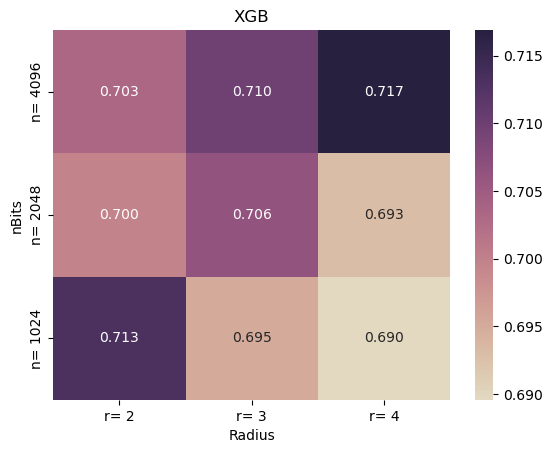

In [42]:
v_min = 0.6
v_max = 0.8

new_df = df4.pivot_table(index="nBits", columns="Radius", values="R2")
new_df.sort_index(level=1, ascending=True, inplace=True)
g = sns.heatmap(new_df,  annot=True, fmt=".3f", cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
           #vmin=v_min ,vmax=v_max)
g.invert_yaxis()
g.get_xaxis().set_visible(True)
g.set_title("XGB")

# X=Y All

In [64]:
import seaborn as sns
import pandas as pd
#df_visual = pd.read_excel("../../NEW/C-MF 2023-11-11/All2.xlsx", sheet_name="show")
df_visual = pd.read_excel("../../[Use] Main File (Run Fingerprint)/Result & Visual/CHON 2024-03-23/All.xlsx")
#C:\Users\Kan\Documents\GitHub\SMILE_to_Feature\First Semester\[Use] Main File (Run Fingerprint)\Result & Visual\CHON 2024-03-23

In [65]:
df_visual

,Model,idx,SMIELS,Atom2,Func. Group,Normal boiling point [K] (Actual),Normal boiling point [K] (Predict)
0,KNN,1809,CCOC1=CC=C(C=C1)C(=O)OCC,CHO,ester,548.15,488.726723
1,KNN,6084,C1CCC/C=C\CC1,CH,alkene,416.15,450.251805
2,KNN,2478,CN1CCCC1=O,CHON,amide,475.15,412.650000
3,KNN,10595,CCCCC(CC)COC(=O)CCC,CHO,ester,488.15,505.666069
4,KNN,1085,CCCC(=O)OCCC(C)C,CHO,ester,452.15,452.142439
...,...,...,...,...,...,...,...
8939,RF,9713,CCCCCCC(=O)OC(C)CC,CHO,ester,509.06,482.552495
8940,RF,9519,CCCCCCOCCCCC,CHO,ester,473.70,510.687133
8941,RF,4680,CC(=O)OCCNCCO,CHON,ester,537.45,449.665450
8942,RF,6319,CC1CCC(C(=O)C1)C,CHO,ketone,447.00,450.751229


Text(0.5, 0.98, '$T_b$ Model Prediction for CHON Scope')

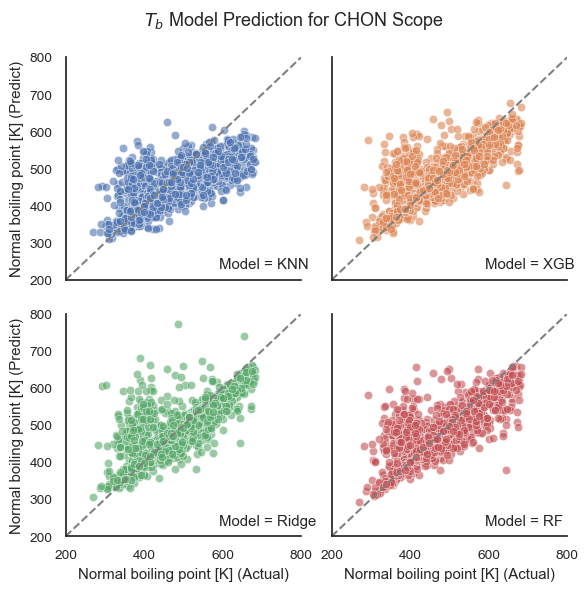

In [69]:
sns.set(font_scale=.9)
sns.set_style("white")
g = sns.FacetGrid(df_visual, col="Model", col_wrap=2, hue="Model")
g.map_dataframe(sns.scatterplot, x="Normal boiling point [K] (Actual)", y="Normal boiling point [K] (Predict)", alpha=0.6)
def annotate(data, **kws):
    plt.axline((300, 300), slope=1, color='.5', linestyle='--')
    ax = plt.gca()
    count = data["Model"].unique()[0]
    ax.text(.65, 0.05, 'Model = {}'.format(count),
            transform=ax.transAxes)
g.map_dataframe(annotate)
g.set_titles(col_template="")
plt.xlim(200,800)
plt.ylim(200,800)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("$T_b$ Model Prediction for CHON Scope")

In [68]:
df_visual2 = df_visual[df_visual["Model"]=="XGB"]
df_visual2

,Model,idx,SMIELS,Atom2,Func. Group,Normal boiling point [K] (Actual),Normal boiling point [K] (Predict)
2236,XGB,1809,CCOC1=CC=C(C=C1)C(=O)OCC,CHO,ester,548.15,502.28345
2237,XGB,6084,C1CCC/C=C\CC1,CH,alkene,416.15,409.68158
2238,XGB,2478,CN1CCCC1=O,CHON,amide,475.15,410.70572
2239,XGB,10595,CCCCC(CC)COC(=O)CCC,CHO,ester,488.15,521.00570
2240,XGB,1085,CCCC(=O)OCCC(C)C,CHO,ester,452.15,456.51346
...,...,...,...,...,...,...,...
4467,XGB,9713,CCCCCCC(=O)OC(C)CC,CHO,ester,509.06,508.16312
4468,XGB,9519,CCCCCCOCCCCC,CHO,ester,473.70,493.37698
4469,XGB,4680,CC(=O)OCCNCCO,CHON,ester,537.45,512.17993
4470,XGB,6319,CC1CCC(C(=O)C1)C,CHO,ketone,447.00,447.62393


(200.0, 800.0)

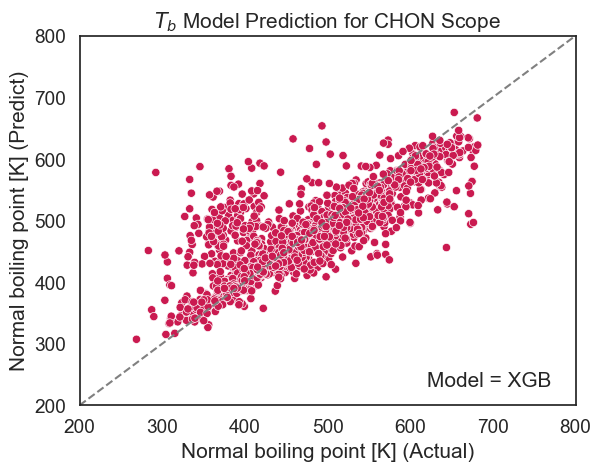

In [82]:
sns.set(font_scale=1.25)
sns.set_style("white")
g= sns.scatterplot(
    data=df_visual2, x="Normal boiling point [K] (Actual)", y="Normal boiling point [K] (Predict)",
    #col="Model", col_wrap=1,
    hue="Model",
    #style="Model",
    palette="rocket_r",
    #kind="scatter", 
    legend=False,
    #aspect=1
    
)
ax = plt.gca();    count = df_visual2["Model"].unique()[0];    ax.text(.70, 0.05, 'Model = {}'.format(count), transform=ax.transAxes)
plt.axline((300, 300), slope=1, color='.5', linestyle='--')
plt.title("$T_b$ Model Prediction for CHON Scope")
plt.xlim(200,800)
plt.ylim(200,800)

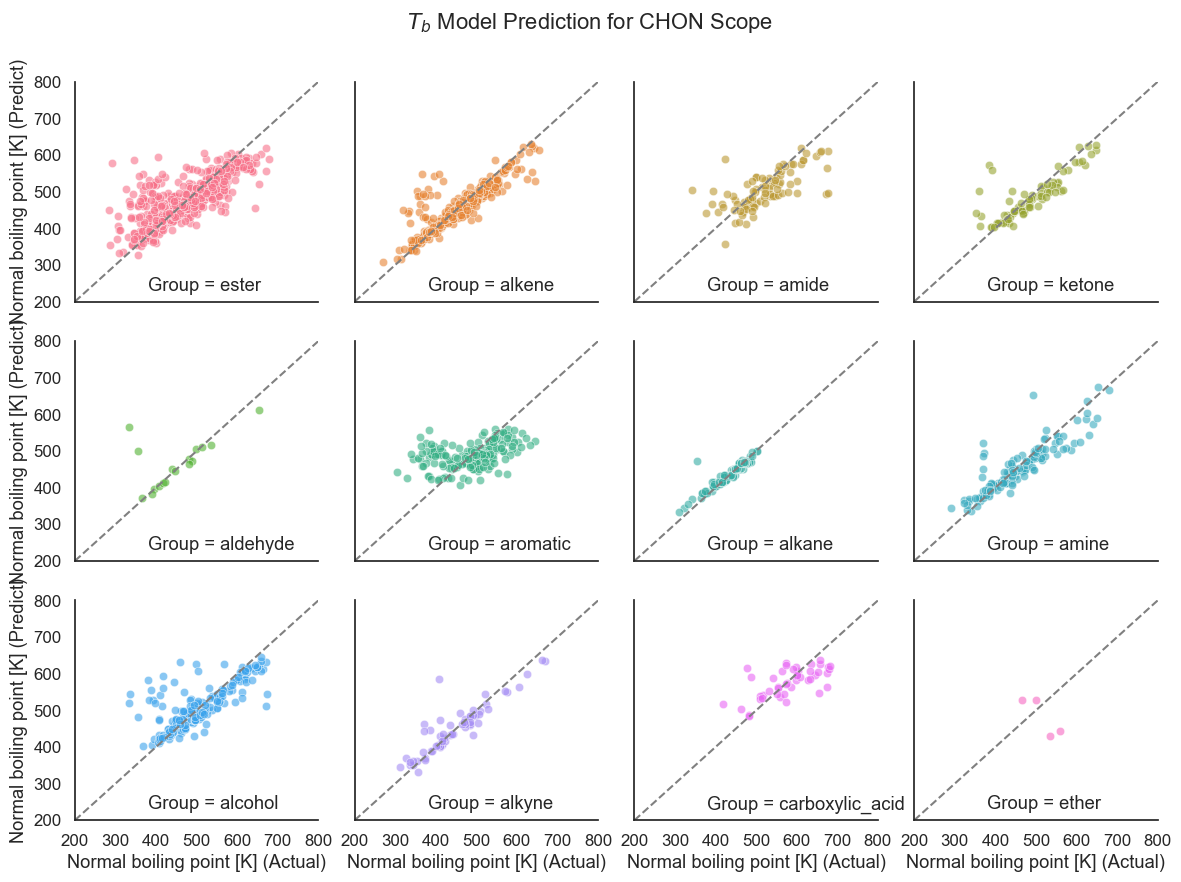

<Figure size 30000x30000 with 0 Axes>

In [102]:
sns.set(font_scale=1.1)
sns.set_style("white")
g = sns.FacetGrid(df_visual2, col="Func. Group", col_wrap=4, hue="Func. Group")
g.map_dataframe(sns.scatterplot, x="Normal boiling point [K] (Actual)", y="Normal boiling point [K] (Predict)", alpha=0.6)
def annotate(data, **kws):
    plt.axline((300, 300), slope=1, color='.5', linestyle='--')
    ax = plt.gca()
    count = data["Func. Group"].unique()[0]
    #print(count)
    ax.text(.3, 0.05, 'Group = {}'.format(count), transform=ax.transAxes)
g.map_dataframe(annotate)
g.set_titles(col_template="")    
plt.figure(figsize=(300,300))
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("$T_b$ Model Prediction for CHON Scope")
g.set(xlim=(200, 800))
g.set(ylim=(200, 800))
g.set(xticks=range(200,900,100))
plt.show()

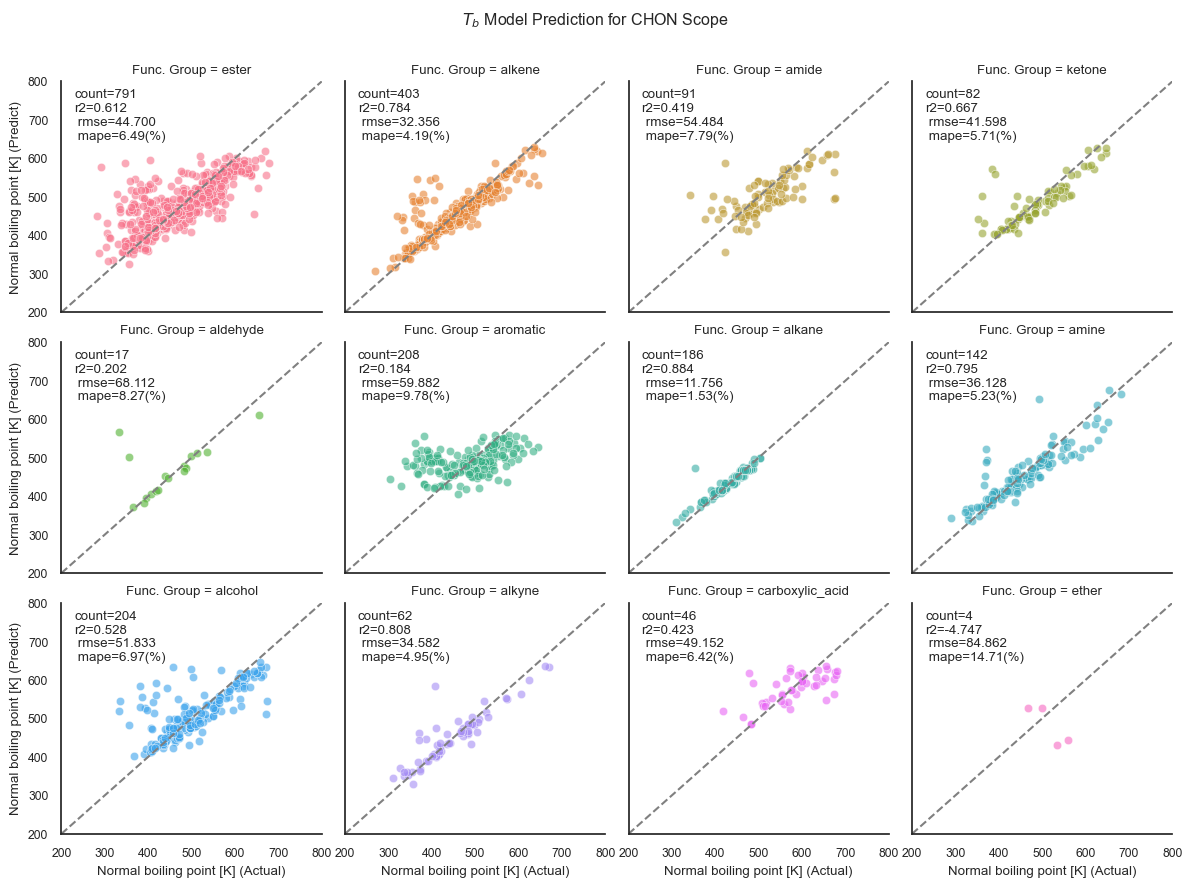

<Figure size 30000x30000 with 0 Axes>

In [95]:
sns.set(font_scale=0.8)
sns.set_style("white")
g = sns.FacetGrid(df_visual2, col="Func. Group", col_wrap=4, hue="Func. Group")
g.map_dataframe(sns.scatterplot, x="Normal boiling point [K] (Actual)", y="Normal boiling point [K] (Predict)", alpha=0.6)
def annotate(data, **kws):
    plt.axline((300, 300), slope=1, color='.5', linestyle='--')
    actual = data['Normal boiling point [K] (Actual)']
    predict = data['Normal boiling point [K] (Predict)']
    r2 = r2_score(actual, predict)
    count = len(actual)
    rmse = mean_squared_error(actual, predict, squared=False)
    mape = mean_absolute_percentage_error(actual, predict)
    mape = mape*100
    ax = plt.gca()
    ax.text(.05, 0.75, 'count={}\nr2={:.3f}\n rmse={:.3f}\n mape={:.2f}(%)'.format(count, r2, rmse, mape),            transform=ax.transAxes)
g.map_dataframe(annotate)
    
plt.figure(figsize=(300,300))
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("$T_b$ Model Prediction for CHON Scope")
g.set(xlim=(200, 800))
g.set(ylim=(200, 800))
#g.set(xticks=range(200,800,100))
plt.show()